# Hall vs HFI Stall Torque

The data show about a 5% difference in the stall torque per amp between hall and HFI.

This is evident in the slope of the load cell reading versus the applied motor current.


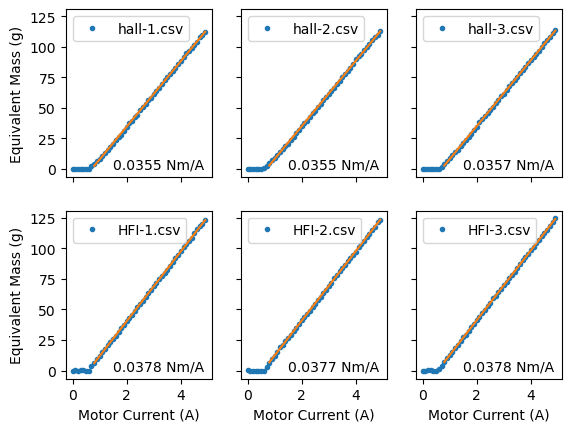

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analysis(filename, row, col):
    # read data log file and plot raw data
    data = pd.read_csv(filename, sep=';')
    data.plot(x='Current Setpoint y', y='Equivalent Mass y', ax=ax[row, col], label=filename, style='.')
    
    # ignore low currents that don't overcome cogging torque and fit slope
    fit_data = data.iloc[8:]
    fit = np.polyfit(fit_data['Current Setpoint y'], fit_data['Equivalent Mass y'], 1)
   
    # convert mass from grams to newton meters per amp
    # torque = lever arm * equivalent mass (kg) * g
    lever_arm_m = 0.135
    torque_per_amp = fit[0] / 1000 * lever_arm_m * 9.8

    # plot fit and annotate 
    ax[row, col].plot(fit_data['Current Setpoint y'], np.polyval(fit, fit_data['Current Setpoint y']))
    ax[row, col].text(1.5, 0, f'{torque_per_amp:.4f} Nm/A')
    ax[row, col].set_xlabel('Motor Current (A)')
    ax[row, col].set_ylabel('Equivalent Mass (g)')
    
    # return torque constant
    return torque_per_amp
   
filenames = ['hall-1.csv', 'hall-2.csv', 'hall-3.csv', 'HFI-1.csv', 'HFI-2.csv', 'HFI-3.csv']

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
df_dict_list = []
for i, filename in enumerate(filenames):
    sensor = filename.split('-')[0]
    if sensor == 'hall':
        row = 0
    elif sensor == 'HFI':
        row = 1
    col = int(filename.split('-')[1][:1]) - 1
    slope = analysis(filename, row, col)
    df_dict_list.append({'torque constant (Nm/A)':slope, 'sensor':sensor})

In [69]:
# here are the means of the trials
pd.DataFrame(df_dict_list).groupby('sensor').mean()

,torque constant (Nm/A)
sensor,
HFI,0.037768
hall,0.035532
